In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler

from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/new_y1.csv")
df.tail()

,Date_,Month,Date,Year,Weekday,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
372,7/26/2024,7,26,2024,Friday,80,24,54,12,20,12,27,50,104,26,OF-NP-E
373,7/30/2024,7,30,2024,Tuesday,42,32,12,4,30,12,36,50,104,26,ST-NP-O
374,8/2/2024,8,2,2024,Friday,63,9,21,8,30,16,10,50,104,26,OF-P-O
375,8/6/2024,8,6,2024,Tuesday,22,18,22,12,30,16,30,50,104,26,OF-NP-O
376,8/9/2024,8,9,2024,Friday,66,27,52,12,30,16,40,50,104,26,TWOF-NP-O


In [3]:
df.drop(labels=['Date_','Month','Date','Year','Weekday',], axis=1, inplace=True)

In [4]:
df.head()

,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
0,20,40,9,2,80,84,72,84,5,54,SXTW-NP-E
1,30,60,26,2,42,84,19,84,5,54,EF-NP-E
2,40,80,48,3,63,22,38,84,5,54,SXTW-NP-E
3,11,21,80,3,22,22,76,84,5,54,OF-P-E
4,11,42,92,4,66,22,20,84,5,54,OF-NP-E


In [5]:
df.describe()

,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,33.787798,34.779841,33.843501,29.140584,33.315650,40.575597,33.992042,49.119363,20.488064,38.265252
std,22.071271,27.405385,25.726661,25.817668,26.874681,34.781923,25.600707,21.855158,30.930352,16.601355
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,14.000000
25%,16.000000,12.000000,14.000000,10.000000,12.000000,6.000000,14.000000,24.000000,4.000000,26.000000
50%,30.000000,26.000000,26.000000,20.000000,24.000000,26.000000,27.000000,48.000000,8.000000,36.000000
75%,48.000000,52.000000,48.000000,42.000000,48.000000,69.000000,48.000000,66.000000,16.000000,52.000000
max,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,96.000000,108.000000,68.000000


<Axes: xlabel='Saturn', ylabel='Density'>

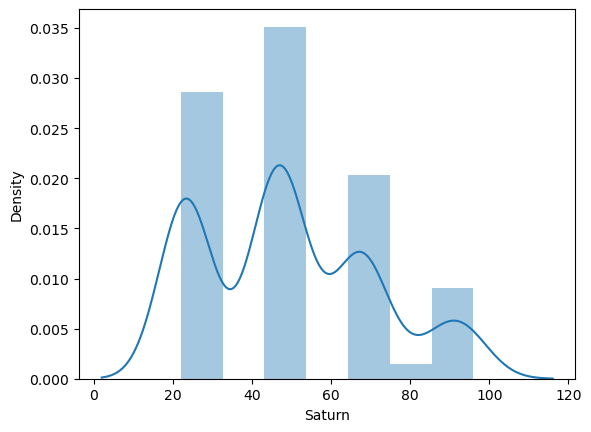

In [6]:
sns.distplot(df['Saturn'])

In [7]:
X = df.drop(columns=['1st Num'])
y = df.iloc[:,-1]

In [8]:
le = LabelEncoder()

y = le.fit_transform(y)

le.classes_

array(['EF-NP-E', 'EF-NP-O', 'EF-P-O', 'OF-NP-E', 'OF-NP-O', 'OF-P-E',
       'OF-P-O', 'ST-NP-E', 'ST-NP-O', 'ST-P-O', 'SXTW-NP-E', 'SXTW-NP-O',
       'SXTW-P-O', 'THOF-NP-O', 'TWOF-NP-E', 'TWOF-NP-O', 'TWOF-P-O',
       'TWST-NP-E', 'TWST-NP-O', 'TWST-P-O'], dtype=object)

In [9]:
y = pd.DataFrame(y, columns=['1st Num'])

In [10]:
X.head()

,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu
0,20,40,9,2,80,84,72,84,5,54
1,30,60,26,2,42,84,19,84,5,54
2,40,80,48,3,63,22,38,84,5,54
3,11,21,80,3,22,22,76,84,5,54
4,11,42,92,4,66,22,20,84,5,54


In [11]:
y.head()

,1st Num
0,10
1,0
2,10
3,5
4,3


In [12]:
X.shape

(377, 10)

In [13]:
y.shape

(377, 1)

In [14]:
# Applying Box-Cox Transform for all the columns in X and fetching their best λ value.
# We are adding 0.000001 to X_train & X_test data, becasue if we have any zero value anywhere, box-cox transform will not work.

pt = PowerTransformer(method='box-cox')

X_transformed = pt.fit_transform(X+0.000001)

pd.DataFrame({'cols':X.columns, 'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Lagna,0.370566
1,Sun,0.304030
2,Moon,0.328813
3,Mars,0.146232
4,Mercury,0.312966
5,Jupiter,0.286638
6,Venus,0.319671
7,Saturn,0.263502
8,Rahu,-0.214391
9,Ketu,0.627515


In [15]:
X_trf_reshaped = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [16]:
X_trf_reshaped.shape

(377, 10, 1)

In [17]:
X_trf_reshaped

array([[[-4.88827798e-01],
        [ 4.57675409e-01],
        [-1.06100355e+00],
        ...,
        [ 1.42768349e+00],
        [-3.32070567e-01],
        [ 9.47762400e-01]],

       [[ 4.22280773e-02],
        [ 9.92231625e-01],
        [-4.43652534e-02],
        ...,
        [ 1.42768349e+00],
        [-3.32070567e-01],
        [ 9.47762400e-01]],

       [[ 4.70453563e-01],
        [ 1.41351780e+00],
        [ 7.26709842e-01],
        ...,
        [ 1.42768349e+00],
        [-3.32070567e-01],
        [ 9.47762400e-01]],

       ...,

       [[ 1.24682312e+00],
        [-1.02792579e+00],
        [-2.78485711e-01],
        ...,
        [ 2.05876304e-01],
        [ 1.72951362e+00],
        [-6.83944609e-01]],

       [[-3.71071872e-01],
        [-4.20587771e-01],
        [-2.28881581e-01],
        ...,
        [ 2.05876304e-01],
        [ 1.72951362e+00],
        [-6.83944609e-01]],

       [[ 1.33395904e+00],
        [-1.25417745e-03],
        [ 8.39339444e-01],
        ...,
        

In [18]:
y.shape

(377, 1)

In [19]:
y_reshaped = y.values.reshape((y.shape[0],1))

In [20]:
y_reshaped

array([[10],
       [ 0],
       [10],
       [ 5],
       [ 3],
       [15],
       [ 7],
       [ 6],
       [ 4],
       [10],
       [ 0],
       [ 6],
       [ 9],
       [ 6],
       [ 3],
       [ 8],
       [ 7],
       [ 5],
       [ 3],
       [ 4],
       [ 3],
       [16],
       [ 6],
       [ 5],
       [ 7],
       [14],
       [ 3],
       [ 5],
       [ 5],
       [10],
       [ 7],
       [ 6],
       [ 6],
       [ 2],
       [ 4],
       [ 6],
       [ 0],
       [ 0],
       [ 7],
       [ 6],
       [ 5],
       [ 4],
       [ 2],
       [ 6],
       [ 9],
       [ 5],
       [ 8],
       [ 2],
       [ 2],
       [ 7],
       [ 4],
       [ 7],
       [ 8],
       [ 5],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [16],
       [ 6],
       [ 7],
       [12],
       [ 9],
       [ 8],
       [ 7],
       [ 0],
       [ 6],
       [12],
       [ 5],
       [ 6],
       [ 6],
       [ 9],
       [ 4],
       [ 0],
       [ 6],
       [11],
       [ 5],

In [21]:
y_reshaped.shape

(377, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_trf_reshaped,y_reshaped,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((301, 10, 1), (301, 1), (76, 10, 1), (76, 1))

In [23]:
X_train

array([[[ 0.65938231],
        [-1.5936262 ],
        [ 0.78378082],
        ...,
        [ 0.02462004],
        [-0.83092782],
        [ 0.63174067]],

       [[ 0.3082985 ],
        [ 0.39462686],
        [-1.15352808],
        ...,
        [ 0.83892443],
        [ 0.17825626],
        [-1.34017756]],

       [[ 1.2761531 ],
        [-0.79128784],
        [ 0.89348172],
        ...,
        [ 0.2058763 ],
        [ 0.97566288],
        [ 0.12846128]],

       ...,

       [[ 1.81055959],
        [-1.02792579],
        [ 1.87947372],
        ...,
        [ 0.11663919],
        [-1.2676791 ],
        [ 1.05015416]],

       [[ 1.1570346 ],
        [-1.5936262 ],
        [-0.08860056],
        ...,
        [-1.18648802],
        [ 1.39027556],
        [ 0.84394789]],

       [[-1.23081159],
        [ 0.9209115 ],
        [ 0.4809628 ],
        ...,
        [ 0.83892443],
        [ 0.17825626],
        [-1.34017756]]])

In [24]:
# Build the LSTM model
model = Sequential()

# Add an LSTM layer with 256 units
model.add(LSTM(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 5 units (one for each number in the combination)
model.add(Dense(1))

In [25]:
# Compile the model using Mean Squared Error as the loss function and Adam optimizer

model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,457 (1.17 MB)

 Trainable params: 307,457 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Training the model

history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 56.1198
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.3824
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.6228
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.1329
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.6769
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6885
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5934
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1643
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0500
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8793
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.9327
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.2400
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9590
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3157
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

In [28]:
X_test.shape

(76, 10, 1)

In [29]:
y_test.shape

(76, 1)

In [30]:
model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8299  


14.754063606262207

In [32]:
# Predicting Probabilities

model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[6.089945 ],
       [6.4465103],
       [5.735264 ],
       [6.5898314],
       [7.0168943],
       [6.0194435],
       [6.217272 ],
       [6.4109287],
       [6.6671844],
       [6.064006 ],
       [6.1269693],
       [6.3798785],
       [6.173114 ],
       [6.6378603],
       [5.3859677],
       [6.319254 ],
       [5.997345 ],
       [6.8708944],
       [6.3380947],
       [6.5632668],
       [6.394081 ],
       [6.164715 ],
       [6.325572 ],
       [6.4222345],
       [5.975976 ],
       [6.0089617],
       [6.8297467],
       [5.5110836],
       [6.4258127],
       [6.585434 ],
       [6.2708416],
       [5.959235 ],
       [6.1693597],
       [5.868735 ],
       [6.294258 ],
       [6.1408052],
       [6.2797813],
       [5.950124 ],
       [6.3164015],
       [6.133403 ],
       [6.4075212],
       [5.8332543],
       [6.0388927],
       [6.254264 ],
       [6.1805773],
       [5.999443 ],
       [6.0801616],
       [6.1521196],
       [6.5857487],
       [5.8121915],
